# Importing Libraries

In [1]:
import torch

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import colorsys
from termcolor import cprint
import random

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = '#7a7374'
XUEBAI = '#fffef9'
YINBAI = '#f1f0ed'
YINHUI = '#918072'

In [4]:
custom_params = {
    'axes.axisbelow': True,
    'axes.edgecolor': YINBAI,
    'axes.facecolor': XUEBAI,
    'axes.grid': True,
    'axes.labelcolor': XINHUI,
    'axes.labelsize': 'large',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.titlecolor': XINHUI,
    'axes.titlesize': 'x-large',
    'figure.edgecolor': YINBAI,
    'figure.facecolor': XUEBAI,
    'figure.figsize': (16, 9),
    'figure.titlesize': 'x-large',
    'grid.alpha': .8,
    'grid.color': YINBAI,
    'grid.linestyle': '--',
    'grid.linewidth': 1.2,
    'legend.edgecolor': YINHUI,
    'patch.edgecolor': XUEBAI,
    'patch.force_edgecolor': True,
    'text.color': XINHUI,
    'xtick.color': YINHUI,
    'ytick.color': YINHUI,
}

mpl.rcParams.update(custom_params)

# Pre-installing Required Functions

In [5]:
def list_head_checker(list_1, list_2):
    for i in range(len(list_2)):
        if list_1[-1] == list_2[0]:
            head, list_2 = list_2[0], list_2[1:]
            list_2.append(head)
        else:
            break
    return list_2

In [6]:
def list_concatenator(list_1, list_2):
    if list_1 != []:
        list_2 = list_head_checker(list_1, list_2)
    list_1 += list_2
    return list_1

In [7]:
def color_list_generator(n=100):
    termcolors = [
        'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
    ]
    global font_colors_list
    font_colors_list = []
    for i in range(((n - 1) // 8 + 1)):
        if n <= 8:
            random_list = random.sample(termcolors, k=n)
            list_concatenator(font_colors_list, random_list)
        else:
            if i < ((n - 1) // 8):
                random_list = random.sample(termcolors, k=8)
                list_concatenator(font_colors_list, random_list)
            else:
                k = n % 8
                if k == 0:
                    random_list = random.sample(termcolors, k=8)
                    list_concatenator(font_colors_list, random_list)
                elif k == 1:
                    random_list = random.sample(termcolors, k=2)
                    font_colors_list = list_concatenator(
                        font_colors_list, random_list)[:-1]
                else:
                    random_list = random.sample(termcolors, k=k)
                    list_concatenator(font_colors_list, random_list)

In [8]:
def font_color_printer(string, *args, **kwargs):
    global font_colors_list, previous_color
    try:
        font_colors_list
    except NameError:
        color_list_generator()
    if font_colors_list == []:
        color_list_generator()
    previous_color = font_colors_list.pop(0)
    return cprint(string, previous_color, *args, **kwargs)

In [9]:
def calm_color_generator(n):
    colors = []
    hue = np.repeat(np.random.random(), n)
    hue_interval = np.linspace(0, 1, n, endpoint=False)
    saturation = 0.6 + np.random.random() / 5.0 * np.random.choice([-1, 1])
    lightness = 0.5 + np.random.random() / 10.0 * np.random.choice([-1, 1])
    h = hue + hue_interval
    h = np.where(h > 1, h - 1, h)
    s = np.repeat(saturation, n)
    l = np.repeat(lightness, n)
    array_hls = np.concatenate((h, l, s)).reshape(-1, n).T
    for hls in array_hls:
        r, g, b = [
            int(256 * e) for e in colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
        ]
        colors.append('#%02X%02X%02X' % (r, g, b))
    return colors

# Practicing in Stages

## 1 Dimensional Tensors

In [51]:
v = torch.tensor([1, 2, 3, 4, 5, 6])
font_color_printer("An ordinary tensor with 1 dimension:", attrs=['bold'], end='\n\t'.expandtabs(4))
cprint(v, previous_color)

An ordinary tensor with 1 dimension:
    tensor([1, 2, 3, 4, 5, 6])


In [52]:
font_color_printer("Data type of a tensor:", attrs=['bold'], end='\n\t'.expandtabs(4))
cprint(v.dtype, previous_color)

Data type of a tensor:
    torch.int64


In [12]:
print(v.type())

torch.LongTensor


In [13]:
cprint("Hello, World!", "red", "on_cyan", attrs=["blink"], end=' ')
cprint("Hello, World!", "red", "on_cyan", attrs=["blink"], end=' ')

Hello, World! Hello, World! 

In [14]:
print(v[0])
print(v[1:-1])
print(v[-1])

tensor(1)
tensor([2, 3, 4, 5])
tensor(6)


In [15]:
f = torch.FloatTensor([1, 2, 3, 4, 5, 6])
print(f)
print(f.dtype)
print(f.type())

tensor([1., 2., 3., 4., 5., 6.])
torch.float32
torch.FloatTensor


In [16]:
print(v.view(6, 1))

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [17]:
print(v.view(3, 2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [18]:
print(v.view(3, -1))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [19]:
a = np.array([1, 2, 3, 4, 5, 6])
tensor_cnv = torch.from_numpy(a)
print(tensor_cnv)
print(tensor_cnv.type())

tensor([1, 2, 3, 4, 5, 6])
torch.LongTensor


In [20]:
numpy_cnv = tensor_cnv.numpy()
print(numpy_cnv)
print(type(numpy_cnv))

[1 2 3 4 5 6]
<class 'numpy.ndarray'>


# Vector Operations

In [21]:
t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([1, 2, 3])
print(t_one + t_two)
print(t_one * t_two)
print(t_one * 5)

tensor([2, 4, 6])
tensor([1, 4, 9])
tensor([ 5, 10, 15])


In [22]:
dot_product = torch.dot(t_one, t_two)
print(dot_product)

tensor(14)


In [23]:
x = torch.linspace(0, 10, 5)
y = torch.exp(x)
print(x)
print(y)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([1.0000e+00, 1.2182e+01, 1.4841e+02, 1.8080e+03, 2.2026e+04])


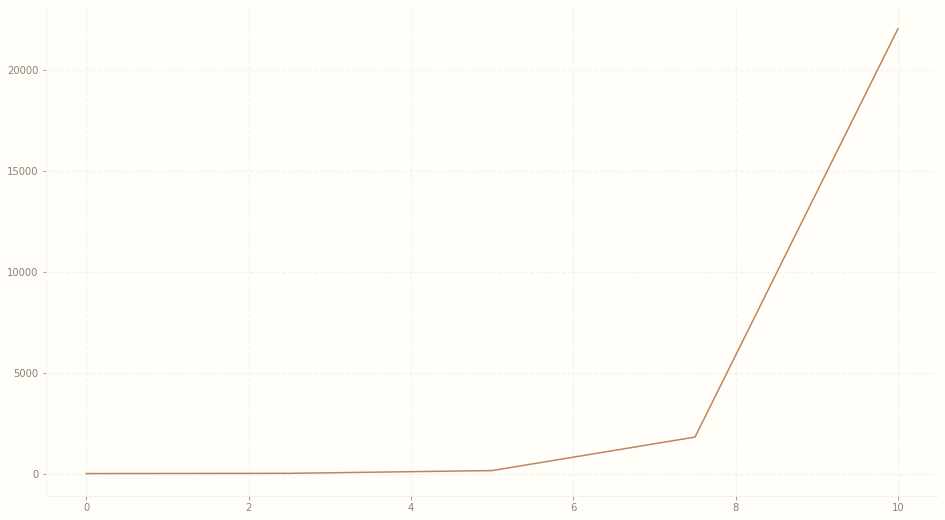

In [24]:
colors = calm_color_generator(1)
plt.plot(x.numpy(), y.numpy(), c=colors[0])

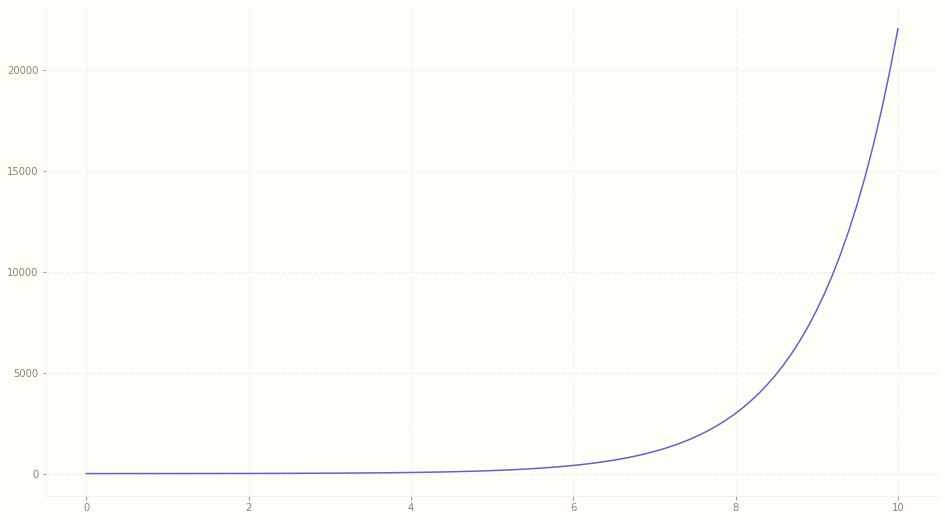

In [25]:
x = torch.linspace(0, 10, 100)
y = torch.exp(x)
colors = calm_color_generator(1)
plt.plot(x.numpy(), y.numpy(), c=colors[0])

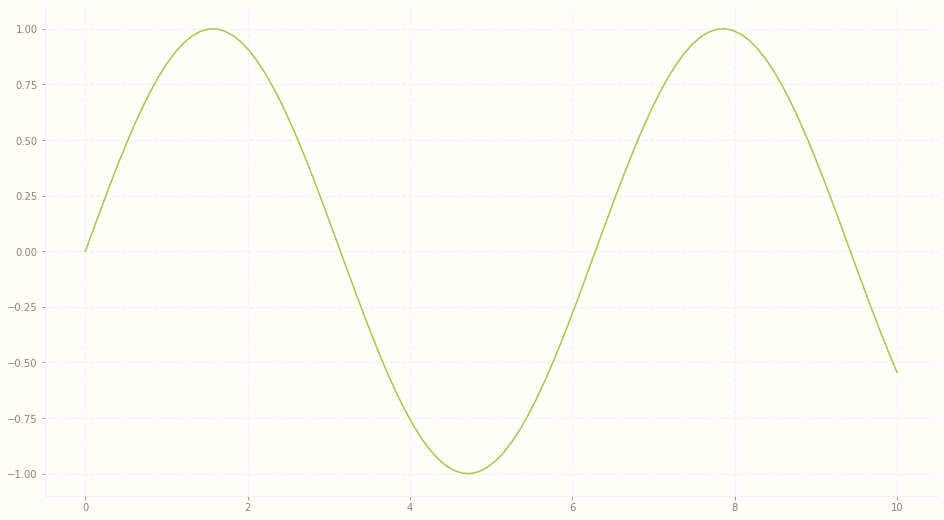

In [26]:
y = torch.sin(x)
colors = calm_color_generator(1)
plt.plot(x.numpy(), y.numpy(), c=colors[0])

# 2 Dimensional Tensors

In [27]:
one_d = torch.arange(2, 7)
print(one_d)

tensor([2, 3, 4, 5, 6])


In [28]:
one_d = torch.arange(2, 7, 2)
print(one_d)

tensor([2, 4, 6])


In [29]:
one_d = torch.arange(0, 9)
print(one_d)
print(one_d.dim())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
1


In [30]:
two_d = one_d.view(3, 3)
print(two_d)
print(two_d.dim())

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
2


In [31]:
print(two_d[0])
print(two_d[:, 0])
print(two_d[0, 0])
print(two_d[1, 2])

tensor([0, 1, 2])
tensor([0, 3, 6])
tensor(0)
tensor(5)


In [32]:
three_d = torch.arange(18).view(2, 3, 3)
print(three_d)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])


In [33]:
three_d = torch.arange(18).view(3, 2, 3)
print(three_d)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])


In [34]:
three_d = torch.arange(18).view(3, 3, 2)
print(three_d)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [35]:
three_d = torch.arange(36).view(3, 3, 4)
print(three_d)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35]]])


# Slicing 3D Tensors

In [36]:
three_d = torch.arange(18).view(3, 2, 3)
print(three_d)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])


In [37]:
print(three_d[1, 1, 1])

tensor(10)


In [38]:
print(three_d[1, 0:2, 1:3])

tensor([[ 7,  8],
        [10, 11]])


In [39]:
print(three_d[1, 0:2, 0:3])

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])


In [40]:
print(three_d[1, :, :])

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])


# Matrix Multiplication

In [41]:
mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)
print(mat_a)

tensor([[0, 3, 5],
        [5, 5, 2]])


In [42]:
mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)
print(mat_b)

tensor([[ 3,  4],
        [ 3, -2],
        [ 4, -2]])


In [43]:
print(torch.matmul(mat_a, mat_b))

tensor([[ 29, -16],
        [ 38,   6]])


In [44]:
print(mat_a @ mat_b)

tensor([[ 29, -16],
        [ 38,   6]])


# Gradient with PyTorch

In [45]:
x = torch.tensor(2.0)
print(x)

tensor(2.)


In [46]:
x = torch.tensor(2.0, requires_grad=True)
print(x)

tensor(2., requires_grad=True)


In [47]:
y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1
y.backward()
print(x.grad)

tensor(330.)


In [48]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()
print(x.grad)
print(z.grad)

tensor(2.)
tensor(12.)
